# Fountain pen

### Created on 12 March 2021

### Author : Ganesamanian Kolappan

## Load libraries

In [1]:
import numpy as np
from numpy import fft
import pandas as pd
import seaborn as sns
import pickle
import glob
import matplotlib.pyplot as plt
from scipy import stats, fftpack
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.manifold import TSNE

import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical, vis_utils, normalize
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, LSTM, Input, RepeatVector, TimeDistributed

## Global variables

In [2]:
root = "dataset/2021_02_11 Original Einstellungen V3 copy/2021_02_11 Original Einstellungen V3 copy/"

classes = ["FVL", "FVR", "G", "H", "KS", "NMGL", "NMGR"]

color = ['b', 'r', 'g', 'c', 'm', 'orange', "y"]
markers = ["v", "^", ",", "<" , "o", ".", ","]

accuracy = []

## Function block

In [4]:
# Function to extract the data
def extract_data(filename, class_value):
    
    # Creating first instance to append later    
    data = pd.read_csv(glob.glob(filename)[0], sep = ";", header=None)
    
    # Extarcting from all the files
    for filename in glob.glob(filename)[1:]:
        data = data.append(pd.read_csv(filename, sep = ";", header=None))
    
    # Removing last three columns as it is reduntant
    data.drop(columns = [data.columns[len(data.columns)-1],
                         data.columns[le    accuracy_scores.append(learner.score(X_test, y_test))n(data.columns)-2],
                         data.columns[len(data.columns)-3]], axis=1, inplace=True)
    
    # Replacing the "," with "." additionally changing
    # data to float as it is string
    for i in range(len(data.columns)):
        data[data.columns[i]] = data[data.columns[i]].apply(lambda x: x.replace(',', '.')).astype('float')

    # Applying standard scaler to the extarcted data
    scaler = StandardScaler()
    scaler.fit(data)
    normalized_data = scaler.transform(data)
    normalized_data = np.asarray(normalized_data)
    
    # Create labels for the class
    label_1 = np.full((1, len(normalized_data)), int(class_value)).T
    total_data = np.hstack((normalized_data, label_1))
#     print(total_data)
    return total_data


# Classification using SVM
def classification_Using_SVM(features, label):
    x_train,x_test,y_train,y_test=train_test_split(features, 
                                               label,
                                               test_size=0.20,
                                               random_state=0)

    svm_classifier = svm.SVC(kernel = 'rbf')
    svm_classifier.fit(x_train, y_train)
    return svm_classifier.predict(x_test), y_test

#Function to plot the confusion matrix in heat map format
def confusion_Matrix(y_test, predict, activities, title):
    
    cf_matrix = metrics.confusion_matrix(y_test, predict, labels=activities)
    plt.figure(figsize=(15,10))
    cm = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='g', 
                xticklabels=activities, yticklabels=activities)
    plt.title("Confusion matrix for"+title, fontsize=25)
    plt.xlabel("Predicted activities", fontsize=20)
    plt.ylabel("Actual activities", fontsize=20)
    plt.xticks(fontsize= 15, rotation=90)
    plt.yticks(fontsize= 15, rotation=0)
#     plt.savefig('Motionsense_confusion_matrix_'+title+"_"+str(time_step)+"_"+str(window_size)+'.png',
#                 bbox_inches = 'tight')
    plt.show()
    
# TSNE plot
def tsne_plot(data, num_label, label, name):
    dim =3
    model = TSNE(n_components=dim, random_state=0,perplexity=50, n_iter=500)
    tsne_data = model.fit_transform(data)
    print(tsne_data.shape)
   
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(data)):
        ax.scatter(tsne_data[i][0], tsne_data[i][1], tsne_data[i][2], 
                   c=color[num_label[i]], marker=markers[num_label[i]], label=label[i], s=40)


    ax.set_xlabel('Feature-1', fontsize= 17)
    ax.set_ylabel('Feature-2', fontsize= 17)
    ax.set_zlabel('Feature-3', fontsize= 17)
    ax.set_title("Feature distribution of " + name,
                 fontsize= 20)
    handles, labels = ax.get_legend_handles_labels()
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize= 17, bbox_to_anchor=(1.1, 1), loc='upper left')
 
    
#     plt.savefig("tsne_"+name+'.pdf', bbox_inches = 'tight')
    
    plt.show()
    return tsne_data

## Nest-1

In [4]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-1.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [5]:
label = total_data_nest_1[column_value]
predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [6]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))
accuracy.append(round(metrics.accuracy_score(y_test, predict)*100,2))

Accuracy score: 0.5416666666666666
              precision    recall  f1-score   support

         FVL       0.61      0.60      0.61        63
         FVR       0.38      0.30      0.34        76
           G       0.45      0.36      0.40        80
           H       0.45      0.36      0.40        69
          KS       0.68      0.79      0.73        84
        NMGL       0.68      0.90      0.78        62
        NMGR       0.43      0.51      0.47        70

    accuracy                           0.54       504
   macro avg       0.53      0.55      0.53       504
weighted avg       0.53      0.54      0.53       504



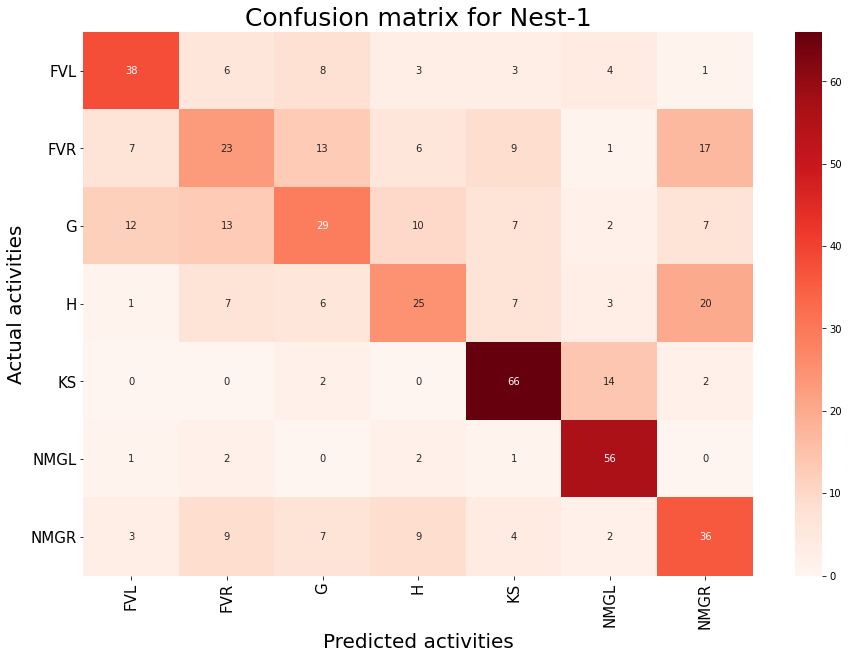

In [7]:
confusion_Matrix(y_test, predict, classes, " Nest-1")

## Nest-2

In [8]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-2.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [9]:
label = total_data_nest_1[column_value]
predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [10]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))
accuracy.append(round(metrics.accuracy_score(y_test, predict)*100,2))

Accuracy score: 0.5932539682539683
              precision    recall  f1-score   support

         FVL       0.69      0.57      0.63        63
         FVR       0.54      0.46      0.50        76
           G       0.56      0.44      0.49        80
           H       0.45      0.43      0.44        69
          KS       0.64      0.88      0.74        84
        NMGL       0.65      0.76      0.70        62
        NMGR       0.59      0.60      0.60        70

    accuracy                           0.59       504
   macro avg       0.59      0.59      0.59       504
weighted avg       0.59      0.59      0.58       504



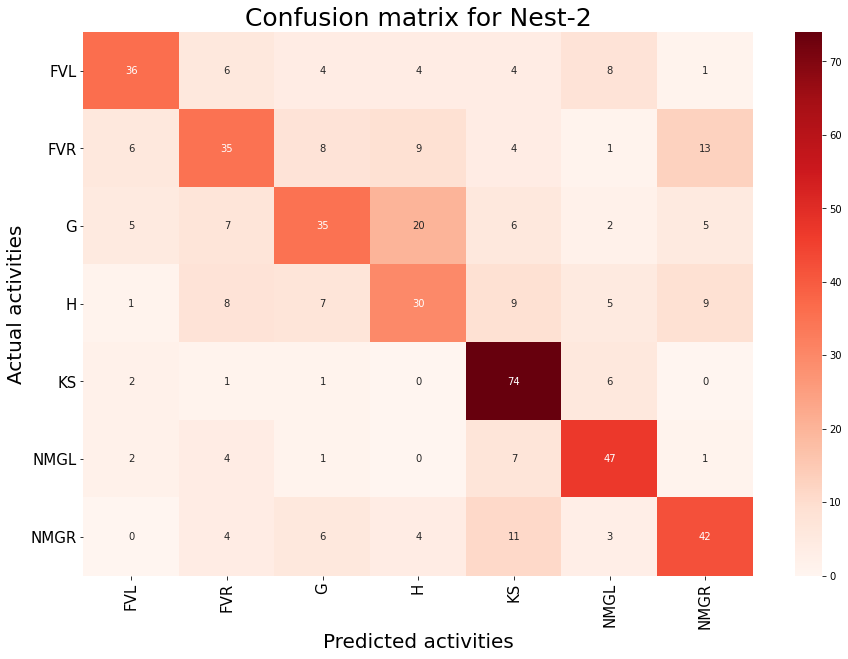

In [11]:
confusion_Matrix(y_test, predict, classes, " Nest-2")

## Nest-3

In [12]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-3.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [13]:
label = total_data_nest_1[column_value]
predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [14]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))
accuracy.append(round(metrics.accuracy_score(y_test, predict)*100,2))

Accuracy score: 0.6428571428571429
              precision    recall  f1-score   support

         FVL       0.52      0.49      0.50        63
         FVR       0.47      0.46      0.47        76
           G       0.55      0.53      0.54        80
           H       0.72      0.64      0.68        69
          KS       0.77      0.95      0.85        84
        NMGL       0.82      0.82      0.82        62
        NMGR       0.61      0.59      0.60        70

    accuracy                           0.64       504
   macro avg       0.64      0.64      0.64       504
weighted avg       0.64      0.64      0.64       504



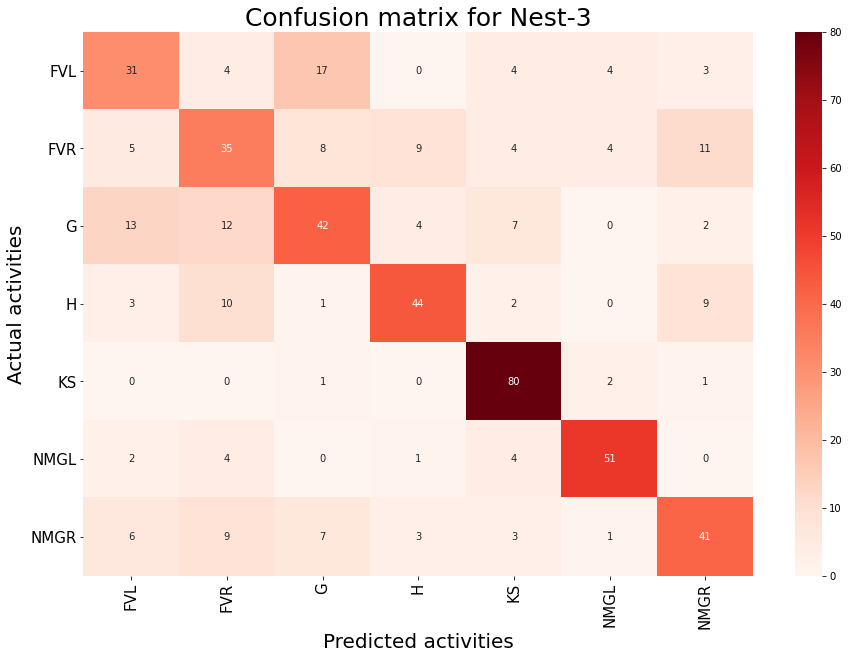

In [15]:
confusion_Matrix(y_test, predict, classes, " Nest-3")

## Nest-4

In [16]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-4.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [17]:
label = total_data_nest_1[column_value]
predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [18]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))
accuracy.append(round(metrics.accuracy_score(y_test, predict)*100,2))

Accuracy score: 0.5714285714285714
              precision    recall  f1-score   support

         FVL       0.65      0.54      0.59        63
         FVR       0.52      0.47      0.50        76
           G       0.57      0.41      0.48        80
           H       0.52      0.42      0.46        69
          KS       0.64      0.88      0.74        84
        NMGL       0.58      0.89      0.70        62
        NMGR       0.46      0.39      0.42        70

    accuracy                           0.57       504
   macro avg       0.56      0.57      0.56       504
weighted avg       0.56      0.57      0.56       504



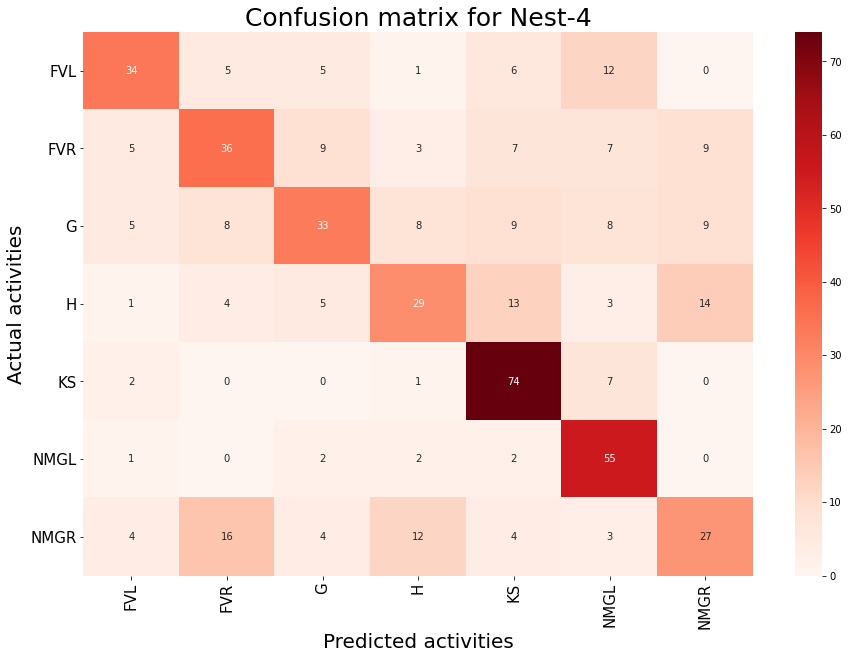

In [19]:
confusion_Matrix(y_test, predict, classes, " Nest-4")

## Velocity - 3.4m

In [20]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 3,4m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [21]:
label = total_data_nest_1[column_value]
predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [22]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))
accuracy.append(round(metrics.accuracy_score(y_test, predict)*100,2))

Accuracy score: 0.6622023809523809
              precision    recall  f1-score   support

         FVL       0.54      0.67      0.60        90
         FVR       0.74      0.51      0.61       111
           G       0.73      0.70      0.72        99
           H       0.74      0.67      0.70        90
          KS       0.59      0.90      0.71        87
        NMGL       0.68      0.61      0.64        90
        NMGR       0.69      0.63      0.66       105

    accuracy                           0.66       672
   macro avg       0.67      0.67      0.66       672
weighted avg       0.68      0.66      0.66       672



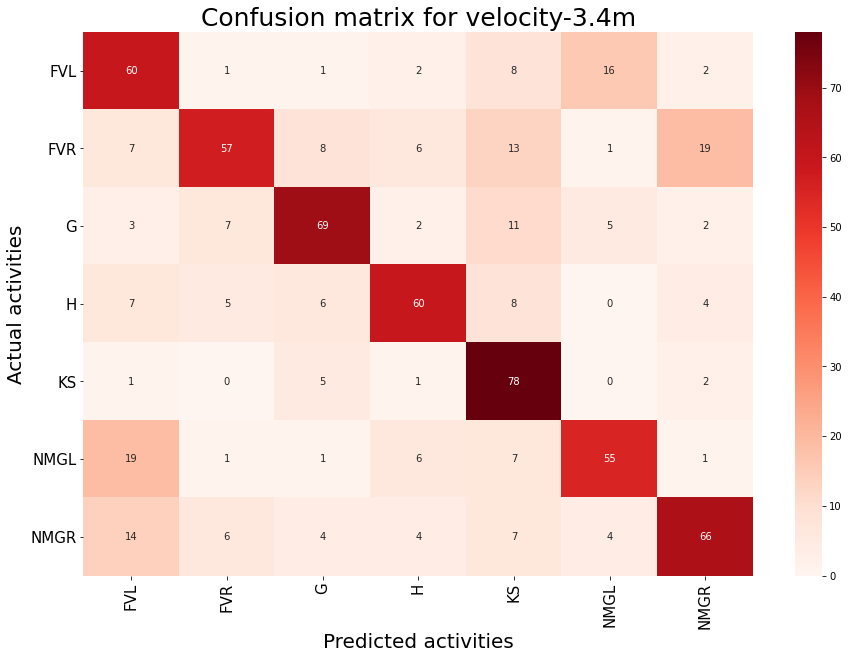

In [23]:
confusion_Matrix(y_test, predict, classes, " velocity-3.4m")

## Velocity - 4.5m

In [5]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [7]:
total_data_nest_1


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-1.005093,-0.910999,-0.879915,-0.718802,-0.880065,-1.057246,-0.685752,-0.586470,-0.977358,-0.766912,...,-0.689681,-0.668882,-0.566403,-1.093796,-0.984416,-1.092289,-1.113483,0.251966,0.410739,FVL
1,-0.391356,-0.346677,-0.510980,-0.738669,-0.194358,-0.191293,-0.695024,-0.631940,0.026106,-0.544245,...,-0.237215,-0.579666,-0.606449,-0.613606,-0.754688,-0.445477,-1.065025,0.108936,0.725041,FVL
2,-0.879478,-0.656274,-1.010135,-1.009032,-0.691660,-0.514682,-0.616214,-0.374276,-0.776865,-0.613582,...,-0.836661,-0.468147,-0.646495,-1.262001,-0.893187,-1.257720,-1.222732,-0.434498,0.627460,FVL
3,-0.926158,-0.834924,-1.056737,-0.754001,-0.739217,-0.701290,-0.718203,-0.753193,-0.898557,-0.438268,...,-0.603223,-0.691185,-0.606449,-1.023460,-0.875162,-0.965371,-1.128859,0.246426,0.262665,FVL
4,-0.480774,-0.641309,-0.169715,-0.584485,-0.722421,-0.499050,-0.472502,-0.722880,-0.162750,-0.495202,...,-0.480740,-0.490451,-0.366172,-0.792825,-1.123099,-0.670023,-1.325920,0.139995,0.145227,FVL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,0.953487,0.203915,-0.506148,-0.112002,1.825320,0.373131,-0.560261,-0.624430,0.609520,0.334869,...,-0.695346,-0.672130,-0.458697,-0.167958,-0.311950,0.622263,-0.689965,-0.119692,-0.672928,NMGR
3356,0.604962,0.473584,-0.613896,-0.635930,1.377001,0.635457,-0.665943,-0.489319,1.050022,1.024027,...,-0.082286,-0.891273,-0.989238,-0.396482,-0.147647,-0.349515,-0.440836,0.799888,0.602699,NMGR
3357,1.379116,0.088824,0.013052,-1.099002,2.372819,0.261174,-1.071057,-0.573763,2.286751,0.079954,...,-0.893689,-0.935101,-0.458697,-0.197192,-0.690982,-0.155053,-0.914227,0.273648,-0.441064,NMGR
3358,0.671124,0.312505,-0.672524,0.393740,1.462108,-0.224129,-0.771625,-0.371097,0.459916,0.302263,...,-0.551096,-0.715958,-0.458697,-0.171093,-0.288226,0.614464,-0.509641,0.262158,-0.579204,NMGR


In [25]:
label = total_data_nest_1[column_value]
predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [26]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))
accuracy.append(round(metrics.accuracy_score(y_test, predict)*100,2))

Accuracy score: 0.6979166666666666
              precision    recall  f1-score   support

         FVL       0.73      0.81      0.77        90
         FVR       0.62      0.55      0.58       111
           G       0.76      0.68      0.72        99
           H       0.61      0.57      0.59        90
          KS       0.72      0.89      0.79        87
        NMGL       0.81      0.86      0.83        90
        NMGR       0.64      0.60      0.62       105

    accuracy                           0.70       672
   macro avg       0.70      0.71      0.70       672
weighted avg       0.69      0.70      0.69       672



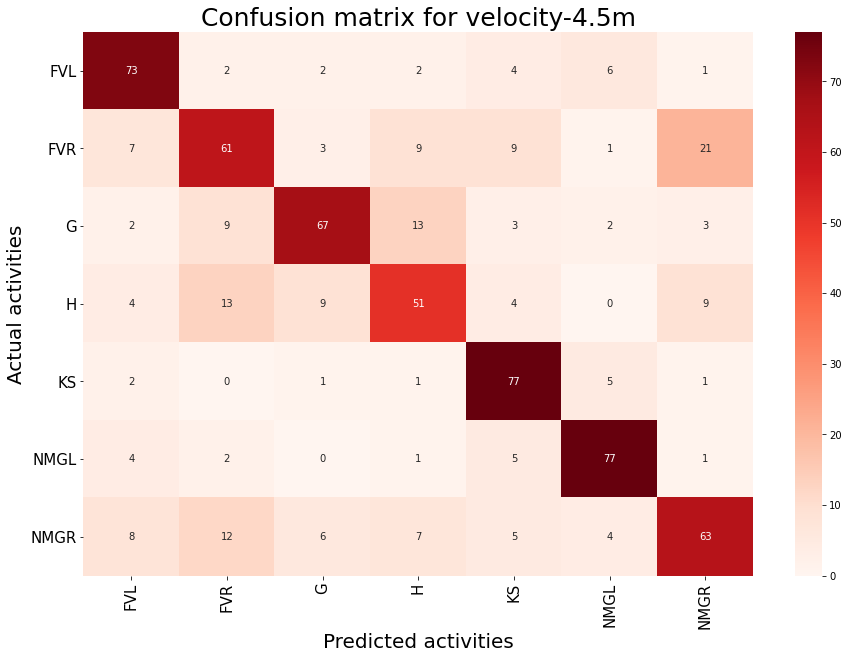

In [27]:
confusion_Matrix(y_test, predict, classes, " velocity-4.5m")

## Velocity - 9.0m

In [28]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 9,0m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [29]:
label = total_data_nest_1[column_value]
predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [30]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))
accuracy.append(round(metrics.accuracy_score(y_test, predict)*100,2))

Accuracy score: 0.6517857142857143
              precision    recall  f1-score   support

         FVL       0.54      0.51      0.53        90
         FVR       0.70      0.64      0.67       111
           G       0.72      0.47      0.57        99
           H       0.62      0.71      0.66        90
          KS       0.60      0.87      0.71        87
        NMGL       0.65      0.73      0.69        90
        NMGR       0.76      0.65      0.70       105

    accuracy                           0.65       672
   macro avg       0.66      0.66      0.65       672
weighted avg       0.66      0.65      0.65       672



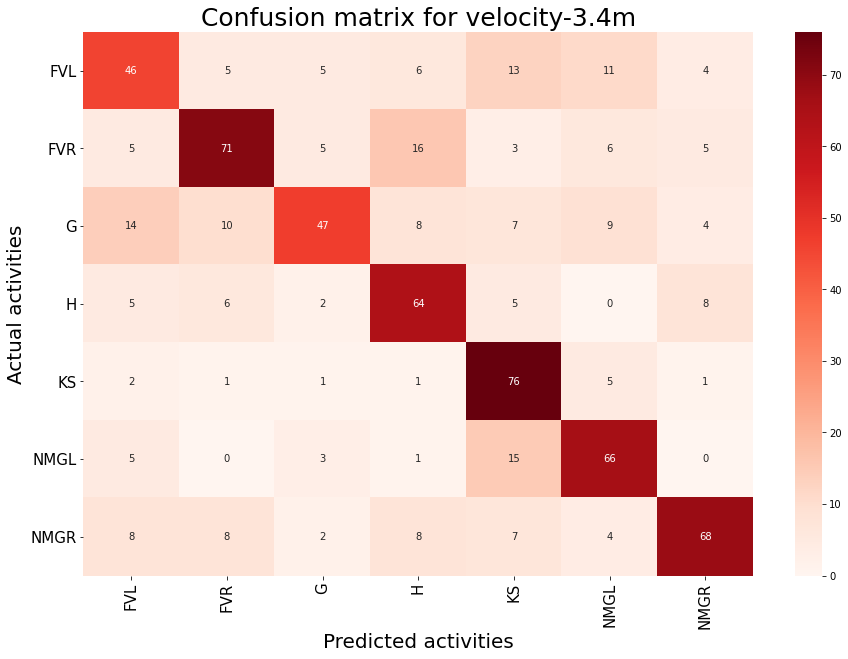

In [31]:
confusion_Matrix(y_test, predict, classes, " velocity-3.4m")

In [32]:
accuracy

[54.17, 59.33, 64.29, 57.14, 66.22, 69.79, 65.18]

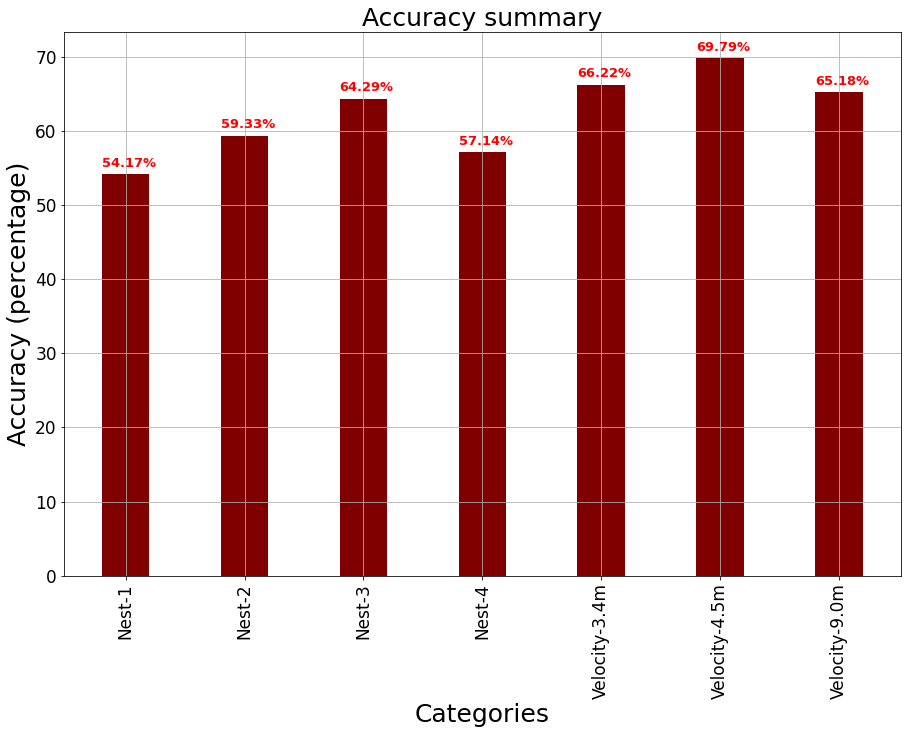

In [33]:
# creating the dataset
x_axis_values = ["Nest-1", "Nest-2", "Nest-3", "Nest-4",
                 "Velocity-3.4m", "Velocity-4.5m", "Velocity-9.0m"]
  
fig = plt.figure(figsize = (15, 10))

# creating the bar plot
plt.bar(x_axis_values, accuracy, color ='maroon', 
        width = 0.4)
plt.grid()
plt.xlabel("Categories", fontsize=25)
plt.ylabel("Accuracy (percentage)", fontsize=25)
plt.title("Accuracy summary",  fontsize=25)
plt.xticks(fontsize=17, rotation=90)
plt.yticks(fontsize=17)
for i in range(len(x_axis_values)):
    plt.text(i-0.2, accuracy[i]+1, str(accuracy[i])+"%", color='red', fontweight='bold',fontsize=13)
        
plt.show()

## TSNE for Nest-1

In [34]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-1.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
num_label = total_data_nest_1[column_value].astype(int)
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})
label = np.asarray(total_data_nest_1[column_value])

(2520, 3)


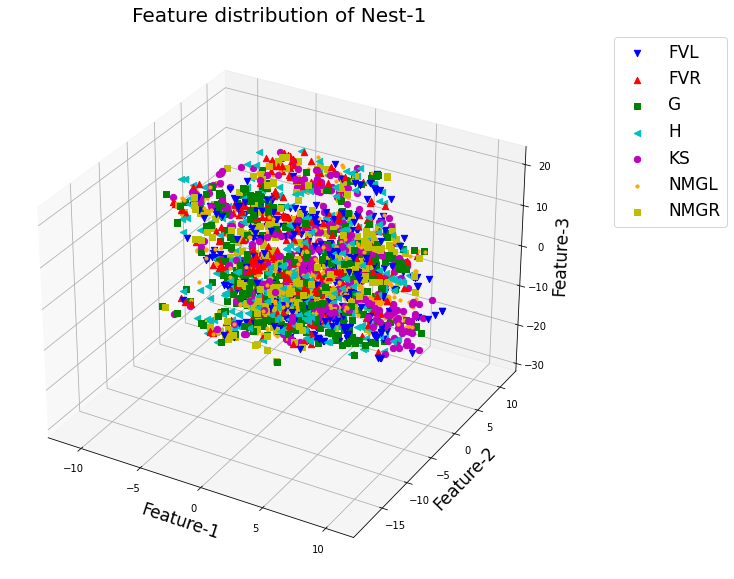

In [35]:
tsne_data_1 = tsne_plot(np.asarray(total_data_nest_1.iloc[:, :-1]), num_label, label, "Nest-1")


In [36]:
predict, y_test = classification_Using_SVM(np.asarray(tsne_data_1), np.asarray(label))

In [37]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.21428571428571427
              precision    recall  f1-score   support

         FVL       0.28      0.33      0.31        63
         FVR       0.18      0.25      0.21        76
           G       0.23      0.06      0.10        80
           H       0.20      0.28      0.23        69
          KS       0.24      0.21      0.23        84
        NMGL       0.18      0.26      0.21        62
        NMGR       0.21      0.14      0.17        70

    accuracy                           0.21       504
   macro avg       0.22      0.22      0.21       504
weighted avg       0.22      0.21      0.21       504



## TSNE for Nest-2

In [38]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-2.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
num_label = total_data_nest_1[column_value].astype(int)
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})
label = np.asarray(total_data_nest_1[column_value])

(2520, 3)


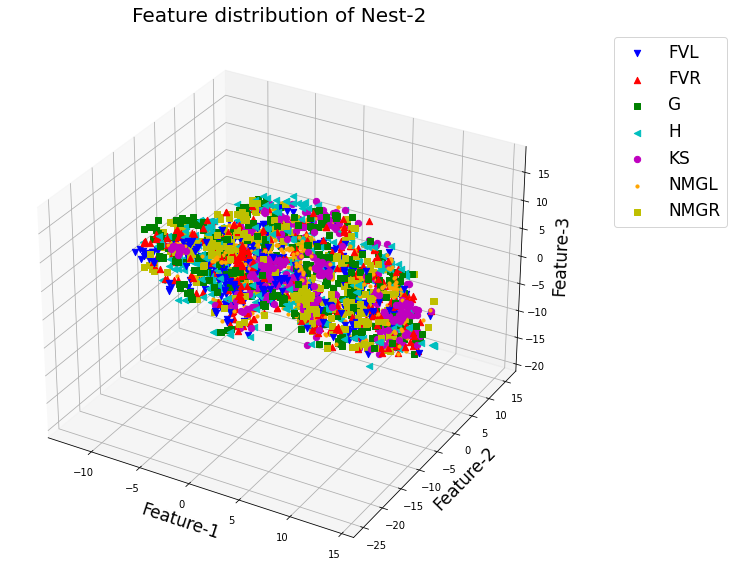

In [39]:
tsne_data_1 = tsne_plot(np.asarray(total_data_nest_1.iloc[:, :-1]), num_label, label, "Nest-2")


## TSNE for Nest-3

In [40]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-3.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
num_label = total_data_nest_1[column_value].astype(int)
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})
label = np.asarray(total_data_nest_1[column_value])

(2520, 3)


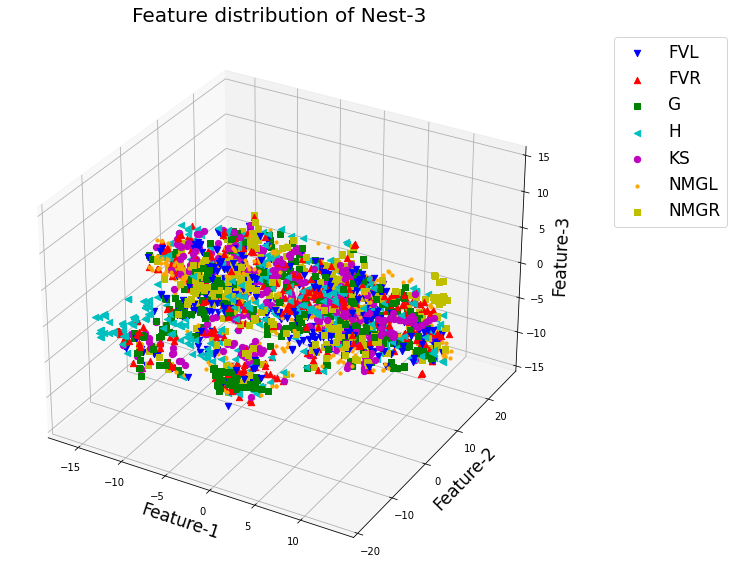

In [41]:
tsne_data_1 = tsne_plot(np.asarray(total_data_nest_1.iloc[:, :-1]), num_label, label, "Nest-3")


## TSNE for Nest-4

In [42]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-4.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
num_label = total_data_nest_1[column_value].astype(int)
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})
label = np.asarray(total_data_nest_1[column_value])

(2520, 3)


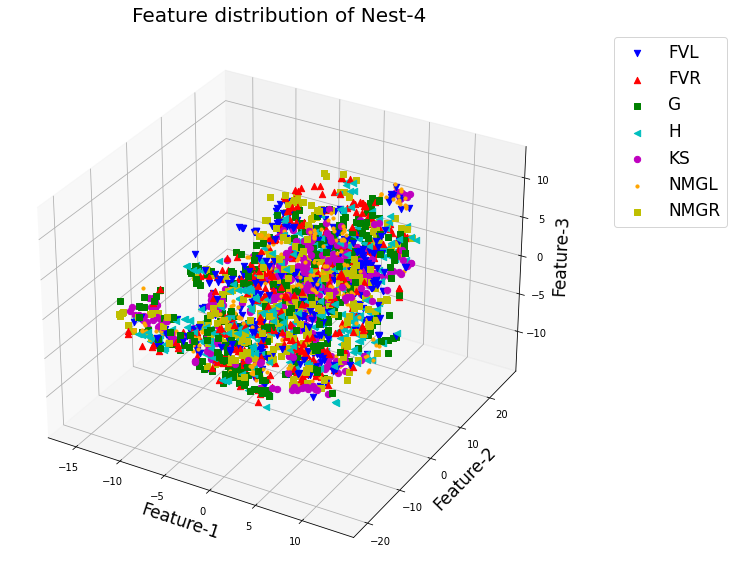

In [43]:
tsne_data_1 = tsne_plot(np.asarray(total_data_nest_1.iloc[:, :-1]), num_label, label, "Nest-4")


## TSNE for velocity-3.4m

In [44]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 3,4m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
num_label = total_data_nest_1[column_value].astype(int)
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})
label = np.asarray(total_data_nest_1[column_value])

(3360, 3)


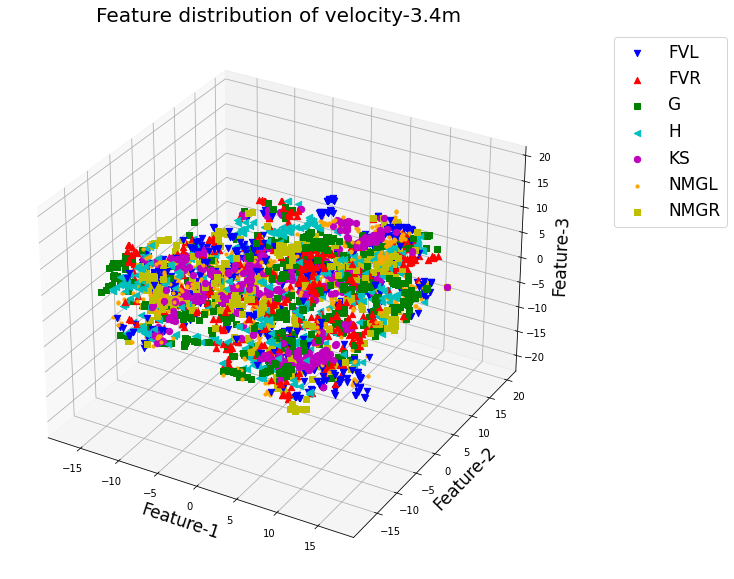

In [45]:
tsne_data_1 = tsne_plot(np.asarray(total_data_nest_1.iloc[:, :-1]), num_label, label, "velocity-3.4m")


## TSNE for velocity-4.5m

In [46]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
num_label = total_data_nest_1[column_value].astype(int)
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})
label = np.asarray(total_data_nest_1[column_value])

(3360, 3)


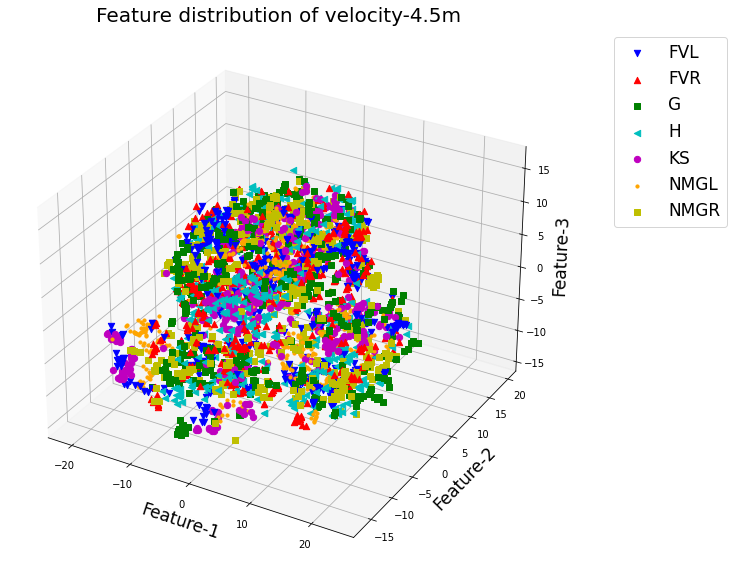

In [47]:
tsne_data_1 = tsne_plot(np.asarray(total_data_nest_1.iloc[:, :-1]), num_label, label, "velocity-4.5m")


## TSNE for velocity-9.0m

In [48]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 9,0m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
num_label = total_data_nest_1[column_value].astype(int)
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})
label = np.asarray(total_data_nest_1[column_value])

(3360, 3)


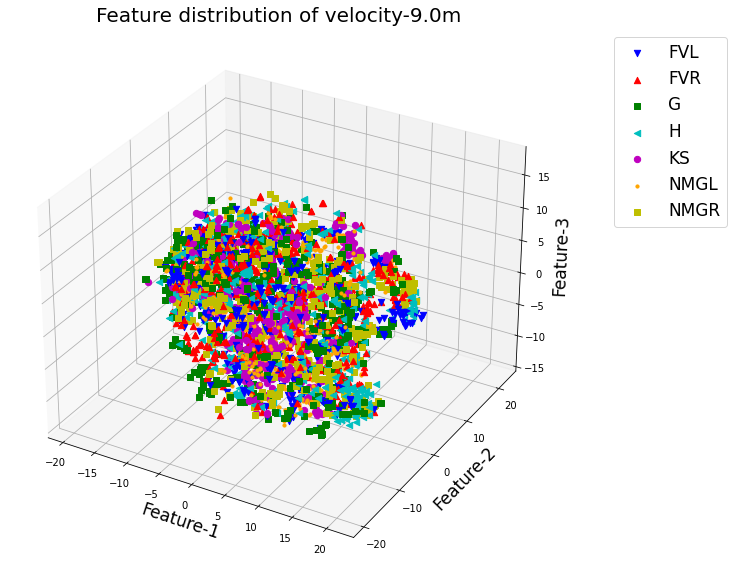

In [49]:
tsne_data_1 = tsne_plot(np.asarray(total_data_nest_1.iloc[:, :-1]), num_label, label, "velocity-9.0m")


## Autoencoders

In [50]:
def autoencoder(total_data, activation_fn, num_features, epoch, batch_n):
    input_layer = Input(shape=(total_data.shape[1],total_data.shape[2], ))
    encoder = LSTM(num_features, activation=activation_fn)(input_layer)
    decoder = RepeatVector(total_data.shape[1])(encoder)
    decoder = LSTM(total_data.shape[2], return_sequences=True, 
                   activation=activation_fn)(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.summary()
    encoderModel = Model(input_layer, encoder)
    autoencoder.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])
    autoencoder.fit(total_data, total_data, epochs = epoch, batch_size = batch_n, verbose=1)
    encoded_data = encoderModel.predict(total_data)
    return encoded_data

In [51]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})

In [52]:
label = total_data_nest_1[column_value]
features = np.asarray(total_data_nest_1.iloc[:, :i])

X_local = []
Y_seq = []
sequence_length = 100
step=1

# Converting the 2-D data to 3-D for LSTM
for start in range(0, len(features) - sequence_length, step):
    end = start + sequence_length
    X_local.append(features[start:end])
    Y_seq.append(label[end-1])

# Converting class labels to numbers for processing
Y_local = pd.factorize(Y_seq)[0].tolist()
X_sequence = np.array(X_local)
Y = np.array(Y_local)

encoded_data = autoencoder(X_sequence, 'sigmoid', 20, 10, 64)

predict, y_test = classification_Using_SVM(encoded_data, Y)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 6)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 100, 20)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 6)            648       
Total params: 2,808
Trainable params: 2,808
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
51/51 [==============================] - 12s 147ms/step - loss: 1.0647 - accuracy: 0.1298
Epoch 2/10
51/51 [==============================] - 7s 146ms/step - loss: 0.9970 - accuracy: 0.1070
Epoch 3/10
51/51 [==============================] - 8s 1

In [53]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))

Accuracy score: 0.2469325153374233


## Left features run for velocity - 4.5m
#### Velocity-4.5m is chosen since its the highest accuracy compae to others.

In [54]:
data =[]
acc = []

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})

In [55]:
left = [i for i in range(0, 31, 2)]
left ## Individual features run for velocity - 4.5m
#### Velocity-4.5m is chosen since its the highest accuracy compae to others.= left + [40, 42, 44]
left_data = np.zeros((total_data_nest_1.shape[0], len(left)))
for count, i in enumerate(left):    
    left_data[:, count] = total_data_nest_1.iloc[:, i]
    
label = total_data_nest_1[column_value]    
predict, y_test = classification_Using_SVM(np.asarray(left_data), np.asarray(label))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.4583333333333333
              precision    recall  f1-score   support

         FVL       0.50      0.42      0.46        90
         FVR       0.40      0.34      0.37       111
           G       0.54      0.44      0.49        99
           H       0.37      0.39      0.38        90
          KS       0.43      0.77      0.55        87
        NMGL       0.54      0.59      0.56        90
        NMGR       0.46      0.31      0.38       105

    accuracy                           0.46       672
   macro avg       0.46      0.47      0.45       672
weighted avg       0.46      0.46      0.45       672



## Right features run for velocity - 4.5m
#### Velocity-4.5m is chosen since its the highest accuracy compae to others.

In [56]:
data =[]
acc = []

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})

In [57]:
right = [i for i in range(1, 32, 2)]
right = right + [41, 43]
right_data = np.zeros((total_data_nest_1.shape[0], len(right)))

for count, i in enumerate(right):    
    right_data[:, count] = total_data_nest_1.iloc[:, i]
    
label = total_data_nest_1[column_value]    
predict, y_test = classification_Using_SVM(np.asarray(right_data), np.asarray(label))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.34226190476190477
              precision    recall  f1-score   support

         FVL       0.32      0.43      0.37        90
         FVR       0.37      0.33      0.35       111
           G       0.36      0.26      0.30        99
           H       0.28      0.23      0.26        90
          KS       0.27      0.20      0.23        87
        NMGL       0.37      0.70      0.48        90
        NMGR       0.39      0.26      0.31       105

    accuracy                           0.34       672
   macro avg       0.34      0.35      0.33       672
weighted avg       0.34      0.34      0.33       672



## Center features run for velocity - 4.5m
#### Velocity-4.5m is chosen since its the highest accuracy compae to others.

In [58]:
data =[]
acc = []

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})

In [59]:
center = [i for i in range(33, 41)]
center_data = np.zeros((total_data_nest_1.shape[0], len(center)))

for count, i in enumerate(center):    
    center_data[:, count] = total_data_nest_1.iloc[:, i]
    
label = total_data_nest_1[column_value]    
predict, y_test = classification_Using_SVM(np.asarray(center_data), np.asarray(label))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.5803571428571429
              precision    recall  f1-score   support

         FVL       0.68      0.60      0.64        90
         FVR       0.56      0.46      0.50       111
           G       0.75      0.66      0.70        99
           H       0.44      0.46      0.45        90
          KS       0.61      0.74      0.67        87
        NMGL       0.55      0.90      0.68        90
        NMGR       0.49      0.32      0.39       105

    accuracy                           0.58       672
   macro avg       0.58      0.59      0.58       672
weighted avg       0.58      0.58      0.57       672



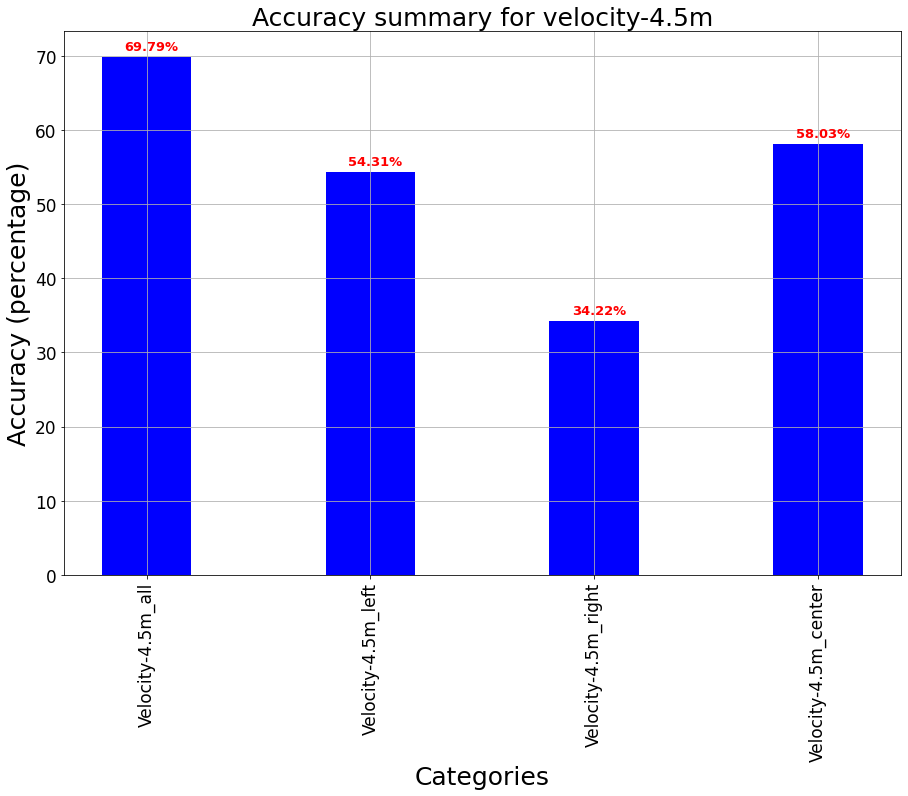

In [60]:
# creating the dataset
x_axis_values = ["Velocity-4.5m_all", "Velocity-4.5m_left", "Velocity-4.5m_right", "Velocity-4.5m_center"]
  
fig = plt.figure(figsize = (15, 10))
accuracy = [69.79, 54.31, 34.22, 58.03]
# creating the bar plot
plt.bar(x_axis_values, accuracy, color ='blue', 
        width = 0.4)
plt.grid()
plt.xlabel("Categories", fontsize=25)
plt.ylabel("Accuracy (percentage)", fontsize=25)
plt.title("Accuracy summary for velocity-4.5m",  fontsize=25)
plt.xticks(fontsize=17, rotation=90)
plt.yticks(fontsize=17)
for i in range(len(x_axis_values)):
    plt.text(i-0.1, accuracy[i]+1, str(accuracy[i])+"%", color='red', fontweight='bold',fontsize=13)
        
plt.show()

## Individual features run for velocity - 4.5m
#### Velocity-4.5m is chosen since its the highest accuracy compae to others.

In [61]:
data =[]
acc = []

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})

In [62]:
label = total_data_nest_1[column_value]
for i in range(1, total_data_nest_1.shape[1]):
    predict, y_test = classification_Using_SVM(np.asarray(total_data_nest_1.iloc[:, :i]), np.asarray(label))
    acc.append(round(metrics.accuracy_score(y_test, predict)*100, 2))

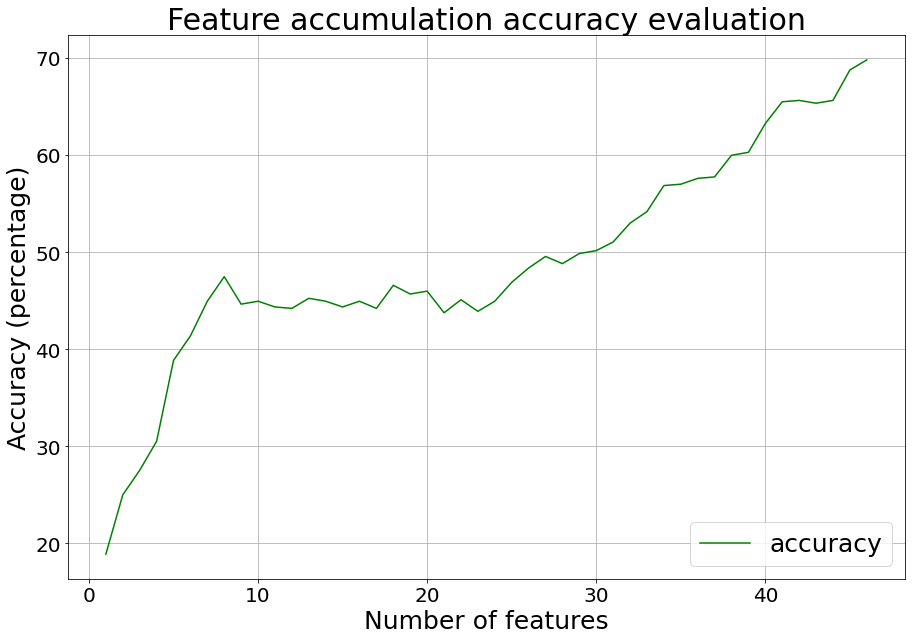

In [63]:
x_axis = np.arange(1, 47, 1)
plt.figure(figsize=(15,10))
plt.plot(x_axis, acc, c='g', label="accuracy")

plt.title("Feature accumulation accuracy evaluation", fontsize=30)
plt.grid()
plt.legend(fontsize= 25, loc='lower right')
plt.xlabel('Number of features', fontsize=25)
plt.ylabel('Accuracy (percentage)', fontsize=25)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
# plt.savefig("weight_init"+'.pdf', bbox_inches = 'tight')
plt.show()


## Random Forest

## Nest-1

In [12]:
def random_forest(features, label):
    
    x_train,x_test,y_train,y_test=train_test_split(features, 
                                               label,
                                               test_size=0.20,
                                               random_state=0)
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(x_train, y_train)
    prediction = random_forest.predict(x_test)
    return prediction, y_test


#Function to plot the complexity curve
def Complexity_curve(features, label, max_tree_number):
    tree_range = np.arange(1, max_tree_number)  
    trainscore = np.zeros(len(tree_range)) 
    testscore = np.zeros(len(tree_range))  
    
    x_train,x_test,y_train,y_test=train_test_split(features, 
                                               label,
                                               test_size=0.20,
                                               random_state=0)     
    
    for i in range(len(tree_range)):
                         
        random_forest = RandomForestClassifier(n_estimators=tree_range[i])
        random_forest.fit(x_train, y_train)
        trainscore[i] = metrics.accuracy_score(y_train,random_forest.predict(x_train)) 
        testscore[i] = metrics.accuracy_score(y_test,random_forest.predict(x_test)) 
        
        
           
    print(max(testscore), np.where(testscore == max(testscore)))        
    # plot the model complexity curves i.e the training error and test error
    plt.figure(figsize=(15,10))
    plt.title('Complexity curves for Random Forest')
    plt.plot(tree_range,testscore,lw = 2,label = 'Test score')
    plt.plot(tree_range,trainscore,lw = 2, label = 'Train score')
    plt.xlabel('Tree Number')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-1.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [14]:
label = total_data_nest_1[column_value]
predict, y_test = random_forest(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))


In [15]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))


Accuracy score: 0.9186507936507936
              precision    recall  f1-score   support

         FVL       0.91      0.94      0.92        63
         FVR       0.93      0.92      0.93        76
           G       0.93      0.82      0.87        80
           H       0.89      0.90      0.89        69
          KS       0.98      0.98      0.98        84
        NMGL       0.92      0.94      0.93        62
        NMGR       0.87      0.94      0.90        70

    accuracy                           0.92       504
   macro avg       0.92      0.92      0.92       504
weighted avg       0.92      0.92      0.92       504



0.9285714285714286 (array([113]),)


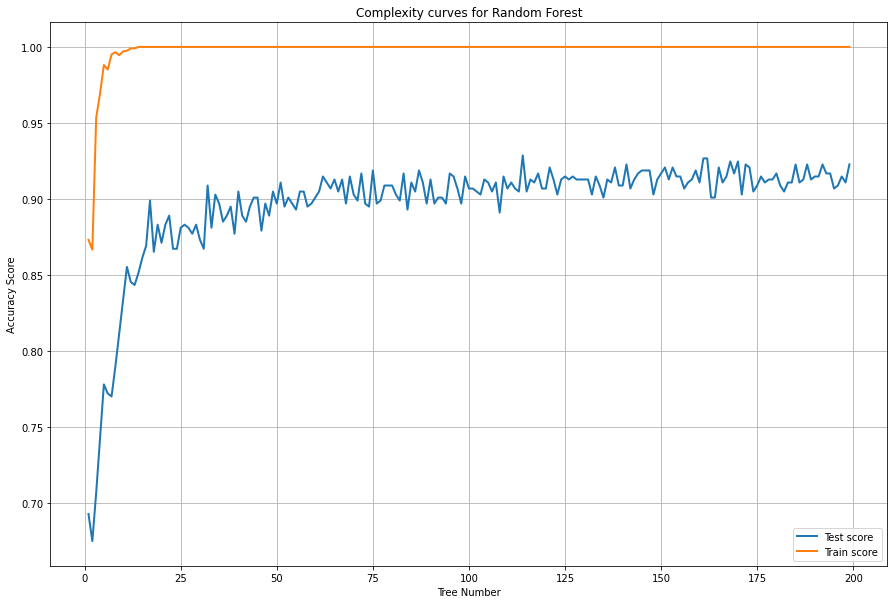

In [16]:
Complexity_curve(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label), 200)

## Nest-2

In [17]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-2.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})

In [18]:
label = total_data_nest_1[column_value]
predict, y_test = random_forest(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [19]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.9186507936507936
              precision    recall  f1-score   support

         FVL       0.90      0.90      0.90        63
         FVR       0.91      0.88      0.89        76
           G       0.92      0.88      0.90        80
           H       0.87      0.90      0.89        69
          KS       0.95      1.00      0.98        84
        NMGL       0.94      0.94      0.94        62
        NMGR       0.93      0.93      0.93        70

    accuracy                           0.92       504
   macro avg       0.92      0.92      0.92       504
weighted avg       0.92      0.92      0.92       504



0.9365079365079365 (array([123]),)


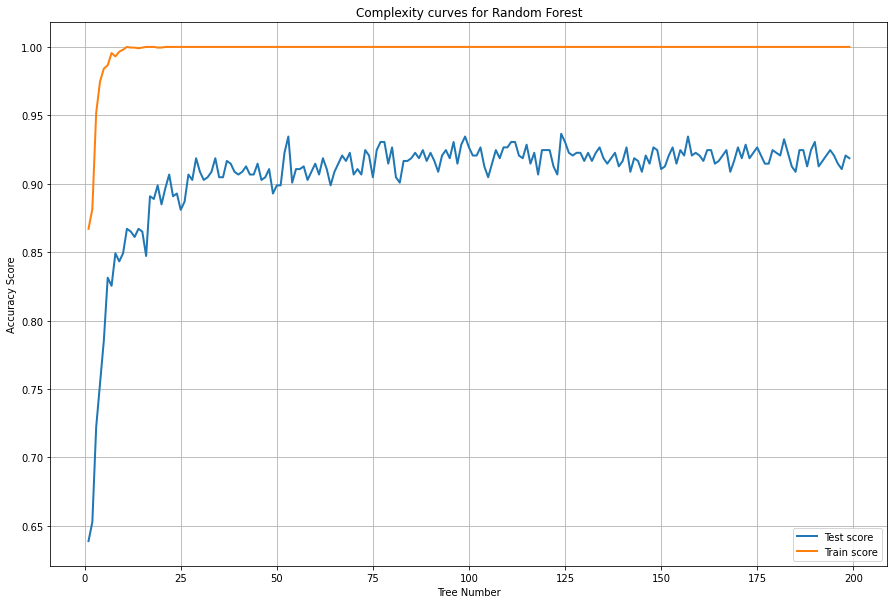

In [20]:
Complexity_curve(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label), 200)

## Nest-3

In [21]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-3.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})

In [22]:
label = total_data_nest_1[column_value]
predict, y_test = random_forest(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [23]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.9444444444444444
              precision    recall  f1-score   support

         FVL       0.95      0.95      0.95        63
         FVR       0.94      0.95      0.94        76
           G       0.94      0.91      0.92        80
           H       0.88      0.91      0.89        69
          KS       1.00      0.99      0.99        84
        NMGL       0.98      1.00      0.99        62
        NMGR       0.93      0.90      0.91        70

    accuracy                           0.94       504
   macro avg       0.94      0.94      0.94       504
weighted avg       0.94      0.94      0.94       504



0.9662698412698413 (array([146, 150]),)


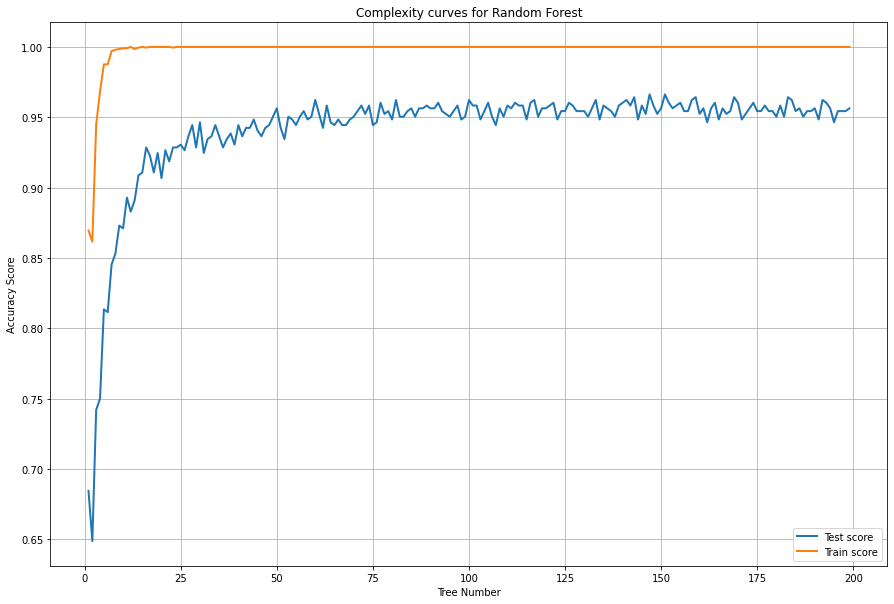

In [24]:
Complexity_curve(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label), 200)

## Nest-4

In [25]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* Nest-4.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [26]:
label = total_data_nest_1[column_value]
predict, y_test = random_forest(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [27]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.9146825396825397
              precision    recall  f1-score   support

         FVL       0.91      0.94      0.92        63
         FVR       0.92      0.89      0.91        76
           G       0.93      0.84      0.88        80
           H       0.86      0.88      0.87        69
          KS       1.00      0.99      0.99        84
        NMGL       0.91      1.00      0.95        62
        NMGR       0.86      0.87      0.87        70

    accuracy                           0.91       504
   macro avg       0.91      0.92      0.91       504
weighted avg       0.92      0.91      0.91       504



0.9285714285714286 (array([182]),)


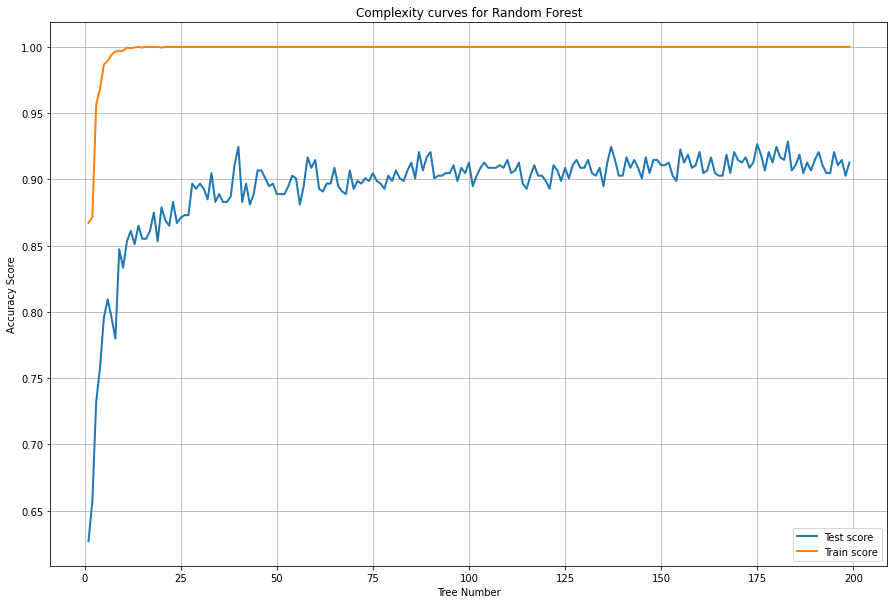

In [28]:
Complexity_curve(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label), 200)

## Velocity-3.4m

In [29]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 3,4m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [30]:
label = total_data_nest_1[column_value]
predict, y_test = random_forest(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [31]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.8869047619047619
              precision    recall  f1-score   support

         FVL       0.85      0.94      0.89        90
         FVR       0.88      0.82      0.85       111
           G       0.86      0.87      0.86        99
           H       0.84      0.89      0.86        90
          KS       0.89      0.99      0.93        87
        NMGL       0.95      0.89      0.92        90
        NMGR       0.95      0.84      0.89       105

    accuracy                           0.89       672
   macro avg       0.89      0.89      0.89       672
weighted avg       0.89      0.89      0.89       672



0.9181547619047619 (array([148]),)


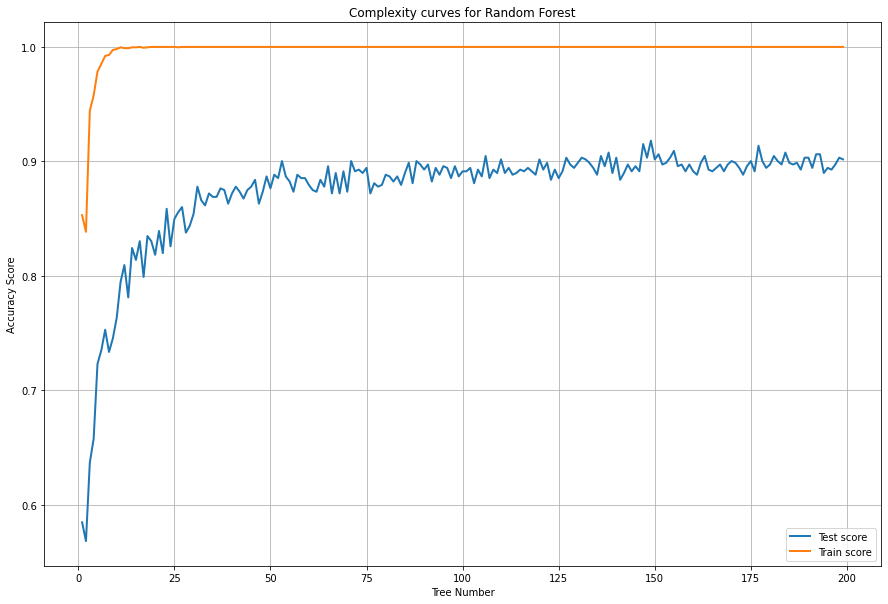

In [32]:
Complexity_curve(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label), 200)

## Velocity-4.5m

In [8]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 4,5m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [9]:
total_data_nest_1

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-1.005093,-0.910999,-0.879915,-0.718802,-0.880065,-1.057246,-0.685752,-0.586470,-0.977358,-0.766912,...,-0.689681,-0.668882,-0.566403,-1.093796,-0.984416,-1.092289,-1.113483,0.251966,0.410739,FVL
1,-0.391356,-0.346677,-0.510980,-0.738669,-0.194358,-0.191293,-0.695024,-0.631940,0.026106,-0.544245,...,-0.237215,-0.579666,-0.606449,-0.613606,-0.754688,-0.445477,-1.065025,0.108936,0.725041,FVL
2,-0.879478,-0.656274,-1.010135,-1.009032,-0.691660,-0.514682,-0.616214,-0.374276,-0.776865,-0.613582,...,-0.836661,-0.468147,-0.646495,-1.262001,-0.893187,-1.257720,-1.222732,-0.434498,0.627460,FVL
3,-0.926158,-0.834924,-1.056737,-0.754001,-0.739217,-0.701290,-0.718203,-0.753193,-0.898557,-0.438268,...,-0.603223,-0.691185,-0.606449,-1.023460,-0.875162,-0.965371,-1.128859,0.246426,0.262665,FVL
4,-0.480774,-0.641309,-0.169715,-0.584485,-0.722421,-0.499050,-0.472502,-0.722880,-0.162750,-0.495202,...,-0.480740,-0.490451,-0.366172,-0.792825,-1.123099,-0.670023,-1.325920,0.139995,0.145227,FVL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,0.953487,0.203915,-0.506148,-0.112002,1.825320,0.373131,-0.560261,-0.624430,0.609520,0.334869,...,-0.695346,-0.672130,-0.458697,-0.167958,-0.311950,0.622263,-0.689965,-0.119692,-0.672928,NMGR
3356,0.604962,0.473584,-0.613896,-0.635930,1.377001,0.635457,-0.665943,-0.489319,1.050022,1.024027,...,-0.082286,-0.891273,-0.989238,-0.396482,-0.147647,-0.349515,-0.440836,0.799888,0.602699,NMGR
3357,1.379116,0.088824,0.013052,-1.099002,2.372819,0.261174,-1.071057,-0.573763,2.286751,0.079954,...,-0.893689,-0.935101,-0.458697,-0.197192,-0.690982,-0.155053,-0.914227,0.273648,-0.441064,NMGR
3358,0.671124,0.312505,-0.672524,0.393740,1.462108,-0.224129,-0.771625,-0.371097,0.459916,0.302263,...,-0.551096,-0.715958,-0.458697,-0.171093,-0.288226,0.614464,-0.509641,0.262158,-0.579204,NMGR


In [34]:
label = total_data_nest_1[column_value]
predict, y_test = random_forest(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [35]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.9002976190476191
              precision    recall  f1-score   support

         FVL       0.89      0.93      0.91        90
         FVR       0.86      0.80      0.83       111
           G       0.94      0.92      0.93        99
           H       0.88      0.92      0.90        90
          KS       0.93      0.99      0.96        87
        NMGL       0.95      0.91      0.93        90
        NMGR       0.85      0.86      0.85       105

    accuracy                           0.90       672
   macro avg       0.90      0.90      0.90       672
weighted avg       0.90      0.90      0.90       672



0.9226190476190477 (array([184]),)


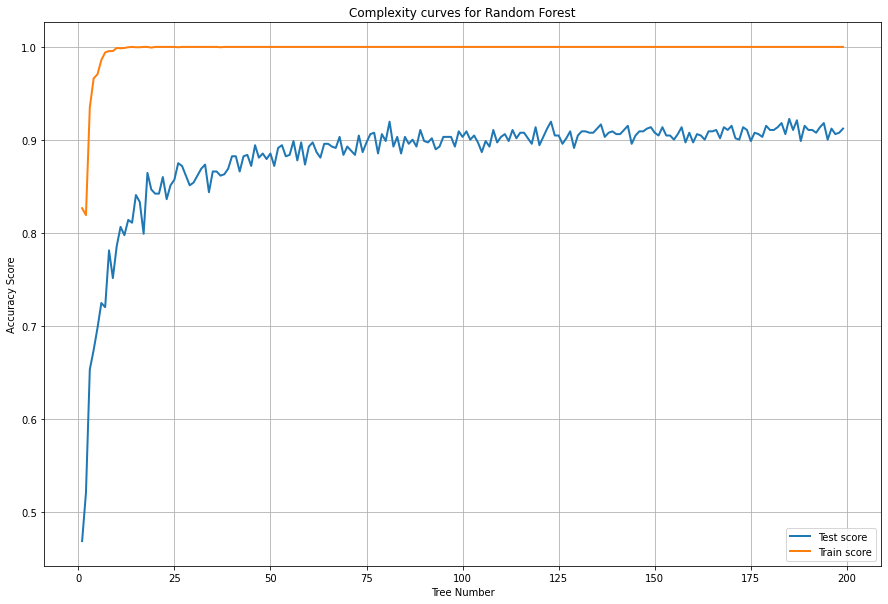

In [36]:
Complexity_curve(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label), 200)

## Velocity-9.0m

In [37]:
data =[]

for count in range(len(classes)):
    filename = root + classes[count]+ "/* 9,0m *.CSV"
    data.append(extract_data(filename, int(count)))

total_data_nest_1 = pd.DataFrame(np.vstack((data[0], data[1], data[2],
                                            data[3], data[4], data[5],
                                            data[6])))

column_value = total_data_nest_1.columns[-1]
total_data_nest_1[column_value] = total_data_nest_1[column_value].map({0.0:'FVL',
                                                                       1.0:'FVR',
                                                                       2.0:'G',
                                                                       3.0:'H',
                                                                       4.0:'KS',
                                                                       5.0:'NMGL',
                                                                       6.0:'NMGR'})


In [38]:
label = total_data_nest_1[column_value]
predict, y_test = random_forest(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label))

In [39]:
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, predict)))
print(metrics.classification_report(y_test, predict, labels=classes))

Accuracy score: 0.8244047619047619
              precision    recall  f1-score   support

         FVL       0.74      0.87      0.80        90
         FVR       0.76      0.79      0.78       111
           G       0.84      0.71      0.77        99
           H       0.76      0.72      0.74        90
          KS       0.99      0.99      0.99        87
        NMGL       0.92      0.96      0.94        90
        NMGR       0.79      0.77      0.78       105

    accuracy                           0.82       672
   macro avg       0.83      0.83      0.83       672
weighted avg       0.83      0.82      0.82       672



0.8616071428571429 (array([184]),)


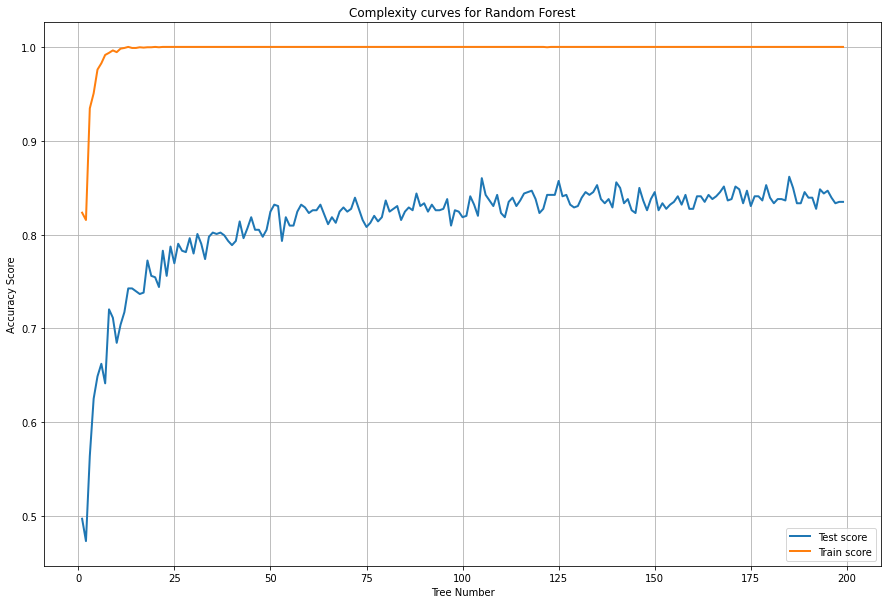

In [40]:
Complexity_curve(np.asarray(total_data_nest_1.iloc[:, :-1]), np.asarray(label), 200)